In [12]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [13]:
max_features = 20000
max_len = 50
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 50), (25000, 50))

In [14]:
model_layers_dict = {
    "RNN 8" : [
        Embedding(max_features, 8),
        SimpleRNN(8, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ],
    "RNN 64" : [
        Embedding(max_features, 64),
        SimpleRNN(64, input_shape=(max_features,max_len)),
        Dense(1, activation='sigmoid'),
    ],
    "LSTM 8" : [
        Embedding(max_features, 8),
        LSTM(8),
        Dense(1, activation='sigmoid'),
    ],
    "LSTM 64" : [
        Embedding(max_features, 64),
        LSTM(64),
        Dense(1, activation='sigmoid'),
    ]
}
models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

RNN 8
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 8)           160000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________
RNN 64
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          1280000   
                                                                 
 simple_rnn_4

In [15]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.5136 - accuracy: 0.7496 - val_loss: 0.4359 - val_accuracy: 0.8024
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 0.3321 - accuracy: 0.8658 - val_loss: 0.4333 - val_accuracy: 0.8039
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.2288 - accuracy: 0.9159 - val_loss: 0.4966 - val_accuracy: 0.7981
Epoch 4/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1547 - accuracy: 0.9478 - val_loss: 0.5500 - val_accuracy: 0.7876
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.1033 - accuracy: 0.9674 - val_loss: 0.6182 - val_accuracy: 0.7832


 25%|██▌       | 1/4 [00:42<02:06, 42.07s/it]

Epoch 1/5
782/782 [==============================] - 17s 21ms/step - loss: 0.5035 - accuracy: 0.7450 - val_loss: 0.4339 - val_accuracy: 0.8056
Epoch 2/5
782/782 [==============================] - 15s 20ms/step - loss: 0.3139 - accuracy: 0.8698 - val_loss: 0.4588 - val_accuracy: 0.7967
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1635 - accuracy: 0.9378 - val_loss: 0.5860 - val_accuracy: 0.7895
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0663 - accuracy: 0.9780 - val_loss: 0.7425 - val_accuracy: 0.7575
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.9049 - val_accuracy: 0.7641


 50%|█████     | 2/4 [01:58<02:04, 62.39s/it]

Epoch 1/5
782/782 [==============================] - 13s 15ms/step - loss: 0.4950 - accuracy: 0.7514 - val_loss: 0.4049 - val_accuracy: 0.8162
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.3142 - accuracy: 0.8706 - val_loss: 0.4048 - val_accuracy: 0.8166
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2407 - accuracy: 0.9094 - val_loss: 0.4699 - val_accuracy: 0.8018
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.1890 - accuracy: 0.9302 - val_loss: 0.4991 - val_accuracy: 0.7972
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.1462 - accuracy: 0.9477 - val_loss: 0.5957 - val_accuracy: 0.7849


 75%|███████▌  | 3/4 [02:59<01:01, 61.79s/it]

Epoch 1/5
782/782 [==============================] - 28s 34ms/step - loss: 0.4591 - accuracy: 0.7755 - val_loss: 0.4010 - val_accuracy: 0.8190
Epoch 2/5
782/782 [==============================] - 27s 34ms/step - loss: 0.2865 - accuracy: 0.8799 - val_loss: 0.4608 - val_accuracy: 0.8033
Epoch 3/5
782/782 [==============================] - 27s 34ms/step - loss: 0.1892 - accuracy: 0.9256 - val_loss: 0.5177 - val_accuracy: 0.8014
Epoch 4/5
782/782 [==============================] - 26s 34ms/step - loss: 0.1195 - accuracy: 0.9560 - val_loss: 0.6624 - val_accuracy: 0.7939
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.0778 - accuracy: 0.9728 - val_loss: 0.7972 - val_accuracy: 0.7874


100%|██████████| 4/4 [05:13<00:00, 78.39s/it]


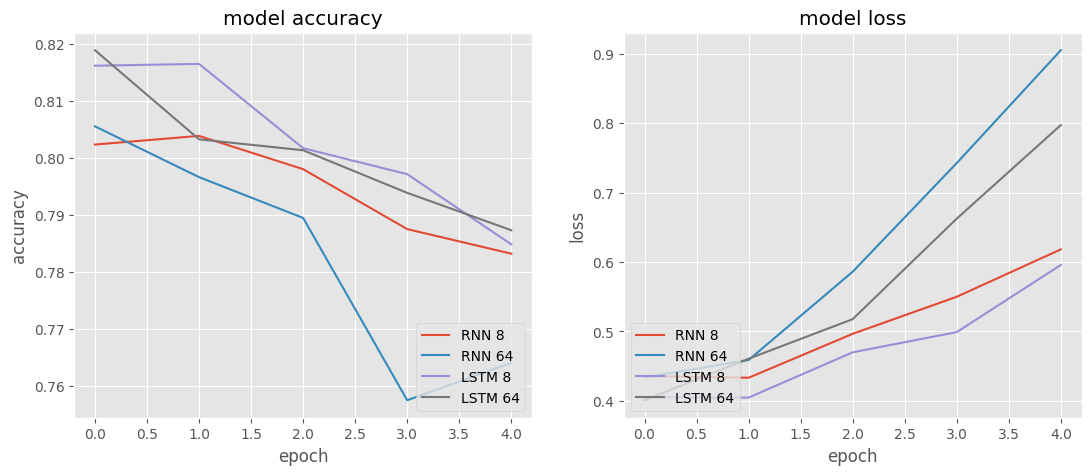

In [16]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join(models.keys()) + '.png');